In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import stochoptim.stochprob.facility_location.facility_location_problem as flp
import stochoptim.stochprob.facility_location.facility_location_solution as fls
import stochoptim.stochprob.facility_location.facility_location_uncertainty as flu

### Generate Problem Parameters

In [2]:
n_facility_locations = 5
n_client_locations = 10
n_zones = 1
#------------
param = flp.generate_random_parameters(n_facility_locations, n_client_locations, n_zones)
param

{'pos_client': array([[0.44436671, 0.33598253],
        [0.45683994, 0.79734215],
        [0.56236326, 0.94684106],
        [0.9324454 , 0.69453343],
        [0.73324695, 0.17028189],
        [0.039696  , 0.84929421],
        [0.42584829, 0.94457475],
        [0.74264099, 0.3027371 ],
        [0.30196082, 0.69582338],
        [0.56488745, 0.37337666]]),
 'pos_facility': array([[0.92582191, 0.34322007],
        [0.82923871, 0.07467313],
        [0.99804077, 0.51155144],
        [0.61799803, 0.20982696],
        [0.33316474, 0.45877957]]),
 'opening_cost': array([43, 42, 57, 71, 52]),
 'facility_capacity': array([40, 35, 36, 36, 32]),
 'max_facilities': 5,
 'min_facilities_in_zone': array([1]),
 'facility_in_zone': array([0, 0, 0, 0, 0]),
 'penalty': array([1000., 1000., 1000., 1000., 1000.])}

### Instantiate Problem

In [3]:
facility_problem = flp.FacilityLocationProblem(param)
facility_problem

Facility Location Problem: (2 stages)
  - decision variables: [5, 55]
    - stage 0: 
      - x: 5 (b)
    - stage 1: 
      - y: 50 (b)
      - z: 5 (c)
  - random variables: [0, 10]
    - stage 1: 
      - h: 10

Network: 
  5 facility locations
  10 client locations
  1 zones

### Instantiate Problem Uncertainty

In [4]:
n_scenarios = 20
p = 0.8
#------------------
client_uncertainty = flu.ClientsPresence(n_scenarios, n_client_locations, p=p) 
client_uncertainty

Presence uncertainty 
  - scenarios: 20 
  - features: 10 
    - h: 10 

### Build scenario tree

In [5]:
# get only scenarios of index [1, 5]
scenario_tree = client_uncertainty.get_scenario_tree([1, 5])
scenario_tree

Node               W=1
  Node             W=0.5	scenario={'h': array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])}
  Node             W=0.5	scenario={'h': array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])}

In [6]:
# get all scenarios
scenario_tree = client_uncertainty.get_scenario_tree()
scenario_tree

Node               W=1
  Node             W=0.05	scenario={'h': array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])}
  Node             W=0.05	scenario={'h': array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])}
  Node             W=0.05	scenario={'h': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}
  Node             W=0.05	scenario={'h': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])}
  Node             W=0.05	scenario={'h': array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])}
  Node             W=0.05	scenario={'h': array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])}
  Node             W=0.05	scenario={'h': array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0])}
  Node             W=0.05	scenario={'h': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}
  Node             W=0.05	scenario={'h': array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1])}
  Node             W=0.05	scenario={'h': array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0])}
  Node             W=0.05	scenario={'h': array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])}
  Node             W=0.05	scenario={'h': array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0])}
  Node           

### Solve the problem on the scenario tree

In [7]:
facility_solution = facility_problem.solve(scenario_tree)
facility_solution

Number of scenario trees: 1 (bushiness: [20.0]) 

Initialize model... Finished. (0.113 sec).
Initialize variables... Finished. (0.021 sec).
Add deterministic constraints at subroot #1... Finished. (0.033 sec).
Define objective function at subtree #1... Finished. (0.012 sec).

Solve scenario tree #1... 
  Precompute variables and parameters... Finished. (0.001 sec).
  Check parameters validity... Finished. (0.000 sec).
  Add random constraints at subtree #1... Finished. (0.015 sec).
  Solve problem at subtree #1... Finished. (1.918 sec).
  Fill scenario tree... Finished. (0.015 sec).
Finished. (1.953 sec).


obj=278.209, gap=0.914%, time=1.9 sec

### Plot optimal solution

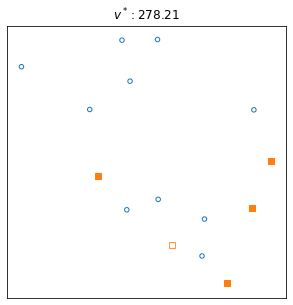

In [8]:
facility_solution.plot_network()

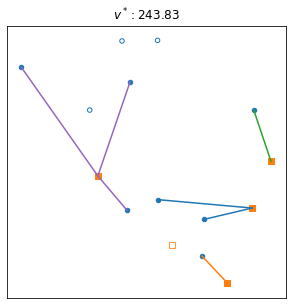

In [9]:
facility_solution.plot_network(scen_index=14)